# Testing multiple neurons and muscles

February 24th, 2017

Stephen Larson

Having seen tests of single muscle and neuron models, let's have a look at more complex systems of them.  We'll run a test of the motor neurons and then have a look at muscles together as a group.

## Boilerplate
First, some boilerplate imports and magic.  We're going to be using the 'runAndPlot' method to run c302 with just a set of parameters.  Be sure to only run the first cell once!

In [1]:
import os
import sys
os.chdir("..") 
from runAndPlot import run_c302
%matplotlib inline

## Running motor neurons and muscles together in one simulation of 81 cells

First we'll be running the SinusoidalInputTest, found at "c302_SinusoidalInputTest.py".  Examining how this is structured, the idea is filters the nervous system so we are only looking at motor neurons, defined as neurons that start with the prefixes VA, VB, DA, DB, DD, VD, and AS, totally 69 muscles.  Then, 12 muscles from a cross-section of the worm are also included in the model.  

c302 fills in the synapses that appear between the neurons and the muscles from the data that is known about how those cells are connected, so it is as if we are playing with a subnetwork of the complete nervous system.  Pretty cool.

The other major thing to note about this setup is that we are injecting sinusoidal input into a single neuron, VB1.  The simulation will then show us the impact that has on the rest of the cells.

The output is quite long, but all very informative.  The entire list of synapses that are used in the model gets output for visual verification of what they are.  In the next cell, we'll comment on the output that we get out.

********************

   Going to generate c302_C2_SinusoidalInputTest and run for 1000 on jNeuroML_NEURON

********************
Set default parameters for C
Set default parameters for C2
Opened file: /home/developer/forks/CElegansNeuroML/CElegans/pythonScripts/c302/../../../herm_full_edgelist.csv
Opened file: /home/developer/forks/CElegansNeuroML/CElegans/pythonScripts/c302/../../../herm_full_edgelist.csv
c302      >>>  Positioning muscle: MVL07 at (-80,-90,-80)
c302      >>>  Positioning muscle: MVL08 at (-80,-60,-80)
c302      >>>  Positioning muscle: MVL09 at (-80,-30,-80)
c302      >>>  Positioning muscle: MVR07 at (-80,-90,80)
c302      >>>  Positioning muscle: MVR08 at (-80,-60,80)
c302      >>>  Positioning muscle: MVR09 at (-80,-30,80)
c302      >>>  Positioning muscle: MDL07 at (80,-90,-80)
c302      >>>  Positioning muscle: MDL08 at (80,-60,-80)
c302      >>>  Positioning muscle: MDL09 at (80,-30,-80)
c302      >>>  Positioning muscle: MDR07 at (80,-90,80)
c302      >>>  Pos

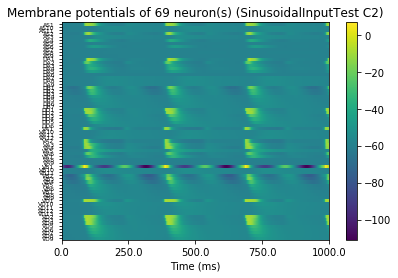

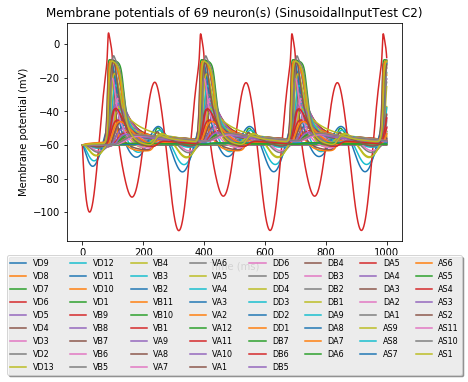

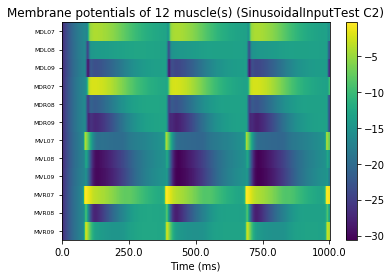

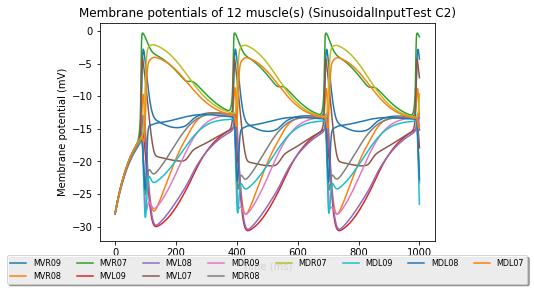

In [2]:
cells, cells_to_stimulate, params, muscles = run_c302('SinusoidalInputTest','C2','',1000,0.05,'jNeuroML_NEURON',verbose=False, plot_ca=False, data_reader="UpdatedSpreadsheetDataReader", config_package="notebooks.configs")

### Interpreting results

As is the standard pattern, the first two graphs are both showing different views of the membrane potential of the 69 neurons, while the bottom two graphs are showing different views of the membrane potential of the 12 muscles.

The results are quite interesting and complicated :)  As we noted above, the only input to this system is sinusoidal input injected into VB1.  This is sufficient to drive all the complex activity that we see.  As expected in the neuron graphs, one neuron stands out, VB1, as exhibiting the sinusoidal input we were injecting (Red line in the second graph that stands out from the crowd).  

One interesting feature is that this activity in one neuron is sufficient to drive a majority of the other neurons to have rising membrane potentials even in the first 100 milliseconds.  Looking through the list of synapses that ended up in the model, I was expecting potentially to see a lot of gap junctions associated with VB1, but in fact there are only a couple between VB1 and VB2.  The majority of the activity, then, looks like it is being driven by acetylcholine synapses (otherwise known as cholinergic synapses).  

Of course, we know that we have very unphysiological parameters for our synapse and gap junction weights here.  But it is still interesting to see the relationship between what we know about the structure of the network and the dynamics that we are seeing.

The effect on the muscles is rather surprising as well.  There is a giant peak of activity right around 500 milliseconds that isn't neatly explained by the activity in the neurons.  At 500 milliseconds, the neurons seem to be doing approximately the same thing they did around 100 milliseconds, but that peak in the muscles only happened once.

## What does this teach us?

So far, we are just trying out injecting some current into a neuron and seeing what happens, so really just probing the system.  But we have also shown that this is probably a really good sub-network to start asking bigger questions.  Ultimately, we are most interested in how the neurons can be made to stimulate the muscles to create a *travelling wave pattern* in the activity of the muscles that goes down the body of the worm.  We know from experiments with the simulated worm body in Sibernetic that this kind of travelling wave pattern is a necessary condition for both swimming and crawling.  What we don't know is how do we get the motor neurons to produce it in the muscles, given the real connectivity we know from the connectome.

## Minimal model of signal propagation along muscles

In order to get a better idea of how a travelling wave might work, let's try designing a model that isolates the muscles and let's just see if we can get activity to flow between muscles, as we know they are connected together via gap junctions.  In the "MuscleSignalPropagation" example, contained in "c302_MuscleSignalPropagation.py", we get rid of the neurons for now and just look at a cross section of muscles.  A stimulus is applied to the MVL08 muscle cell only.  

********************

   Going to generate c302_C2_MuscleSignalPropagation and run for 1000 on jNeuroML_NEURON

********************
Set default parameters for C
Set default parameters for C2
Opened file: /home/developer/forks/CElegansNeuroML/CElegans/pythonScripts/c302/../../../herm_full_edgelist.csv
Opened file: /home/developer/forks/CElegansNeuroML/CElegans/pythonScripts/c302/../../../herm_full_edgelist.csv
c302      >>>  Positioning muscle: MVL07 at (-80,-90,-80)
c302      >>>  Positioning muscle: MVL08 at (-80,-60,-80)
c302      >>>  Positioning muscle: MVL09 at (-80,-30,-80)
c302      >>>  Positioning muscle: MVR07 at (-80,-90,80)
c302      >>>  Positioning muscle: MVR08 at (-80,-60,80)
c302      >>>  Positioning muscle: MVR09 at (-80,-30,80)
c302      >>>  Positioning muscle: MDL07 at (80,-90,-80)
c302      >>>  Positioning muscle: MDL08 at (80,-60,-80)
c302      >>>  Positioning muscle: MDL09 at (80,-30,-80)
c302      >>>  Positioning muscle: MDR07 at (80,-90,80)
c302      >>> 

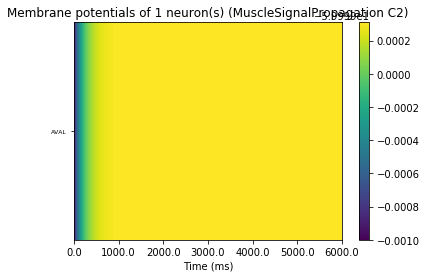

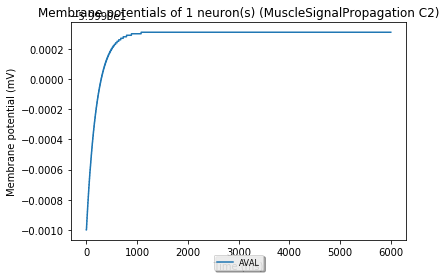

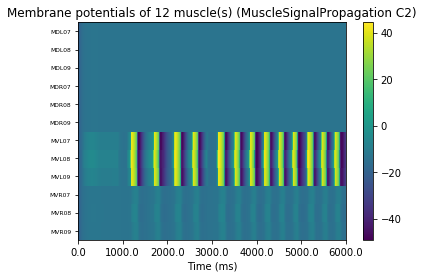

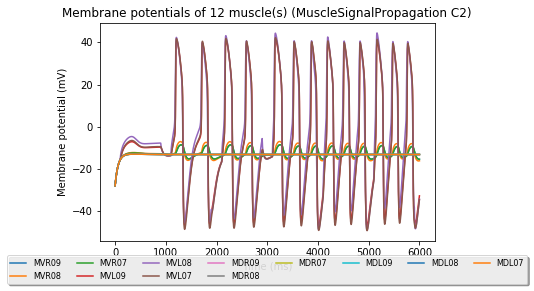

In [3]:
cells, cells_to_stimulate, params, muscles = run_c302('MuscleSignalPropagation','C2','',1000,0.05,'jNeuroML_NEURON',verbose=False,plot_ca=False, data_reader="UpdatedSpreadsheetDataReader", config_package="notebooks.configs")

### Interpreting the results

Since the neurons have been removed, the only two graphs that matter are the last two.  This does actually seem to show that propagation is working.  In the heat graph, it appears that MVL08 stimulates its left and right neighbors MVL07 and MVL09 very rapidly.  Then, more slowly, due to fewer gap junction connections, the signal propagates to the muscles of a different quadrant, the MVR muscles.  It is really the first kind of stimulus that we were most interested in, how the gap junctions affect the direct neighbors, but it is also very interesting to see that there are gap junctions across the quadrants that could play a role as well.

## Conclusions so far and next steps

Now that we have seen that activity can flow between the muscles, there are a few other known biological features that may create the kind of travelling wave.  One is discussed in an online [OpenWorm journal club](https://www.youtube.com/watch?v=puB8R9PW3BI&feature=youtu.be&list=PL8ACJC0fGE7D-EkkR7EFgQESpHONC_kcI&t=2879) where we talk about how proprioceptive stimulus of stretch receptors in certain motor neurons may add activity into those neurons that could then create alternating muscle activity.  This also relies on a second feature, which is inhibition of the muscles via GABA synapses.  

The way we injected sinusoidal input into one motor neuron, we may do the same approach for those neurons that are supposed to have stretch receptors as a first step.  Instead of selecting a cross section of muscles, we may want to pick all muscles so that we can see if any kind of travelling waves are being created that may begin to run down the body of the worm.

We should independently also confirm that our inhibition via GABA synapses is working appropriately.  It is likely that it is not yet configured to have the correct effect, which would hold back this particular mechanism significantly....